# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [211]:
import pandas as pd

In [212]:
# Load the dataset with proper indexing
def load_dataset(file_path):
    # Load the dataset with proper indexing
    df = pd.read_csv(file_path)

    # Check if the dataset is loaded properly
    if not df.empty:
        print("Dataset loaded successfully with proper indexing.")
    else:
        print("Error: Failed to load the dataset.")

    return df

# Call the function to load the dataset
file_path = 'green_tripdata_2018-09.csv'
df = load_dataset(file_path)

Dataset loaded successfully with proper indexing.


# 2- EDA

In [213]:
def get_summary(dataframe):
    print("shape",dataframe.shape)
    print("columns",dataframe.columns)

    print(dataframe.info())
    # Display the first 10 rows of the dataset
    print(dataframe.head(10))
    # Display the last 10 rows of the dataset
    print(dataframe.tail(10))


    # Summary statistics
    print(dataframe.describe())
    print(dataframe.describe(include=['object']))
    print(dataframe.corr())
    # Check for missing values
    print(dataframe.isnull().sum())
    
get_summary(df)    

shape (682046, 20)
columns Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682046 entries, 0 to 682045
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 682046 non-null  object 
 1   lpep pickup datetime   682046 non-null  object 
 2   lpep dropoff datetime  682046 non-null  object 
 3   store and fwd flag     665914 non-null  object 
 4   Rate type              682046 non-null  object 
 5   PU Location            682046 non-null  object 
 6   DO Location            682046 non-null  obj

       passenger count  trip distance    fare amount          extra  \
count    665302.000000  682046.000000  682046.000000  317351.000000   
mean          1.345639       3.577636      14.881002       0.801599   
std           1.072771      10.493566      16.863991       0.579612   
min           1.000000       0.000000     -70.000000      -4.500000   
25%           1.000000       1.110000       7.000000       0.500000   
50%           1.000000       2.100000      10.500000       0.500000   
75%           1.000000       4.360000      18.000000       1.000000   
max         111.000000    8005.680000    8011.500000       8.250000   

             mta tax     tip amount   tolls amount  ehail fee  \
count  682046.000000  682046.000000  682046.000000        0.0   
mean        0.489284       1.034907       0.243319        NaN   
std         0.080305       2.308155       1.269131        NaN   
min        -0.500000      -4.160000       0.000000        NaN   
25%         0.500000       0.000000

C:\Users\Dell\AppData\Local\Temp\ipykernel_76656\2779549398.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.corr())


Vendor                        0
lpep pickup datetime          0
lpep dropoff datetime         0
store and fwd flag        16132
Rate type                     0
PU Location                   0
DO Location                   0
passenger count           16744
trip distance                 0
fare amount                   0
extra                    364695
mta tax                       0
tip amount                    0
tolls amount                  0
ehail fee                682046
improvement surcharge         0
total amount                  0
payment type              16028
trip type                     0
congestion surcharge     682046
dtype: int64


What is the distribution of trip distances?  Are most trips short? Are there any long trips?

What is the relationship between trip distance and fare amount? We might expect longer trips to have higher fares.

How does the number of trips change over time?

Are there differences between vendors? We could compare the average trip distance, fare amount, or any other metric between different vendors.

How does passenger count affect other variables? Does having more passengers lead to longer trips or higher fares?

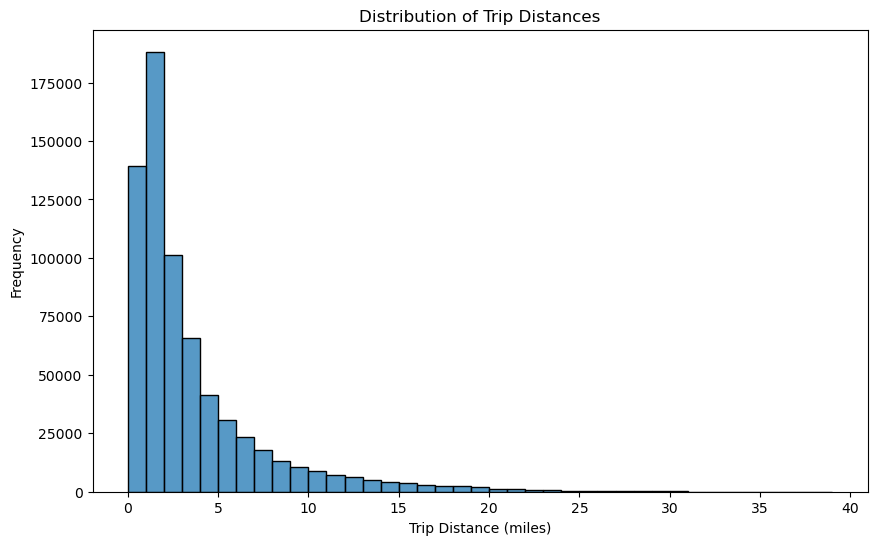

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: What is the distribution of trip distances?
def plot_trip_distance_distribution(dataframe):
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe['trip distance'], bins=range(0, 40, 1))
    plt.title('Distribution of Trip Distances')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Frequency')
    plt.show()


plot_trip_distance_distribution(df)

Most trips are the smaller trips, as the distance increases the number of trips decreases.

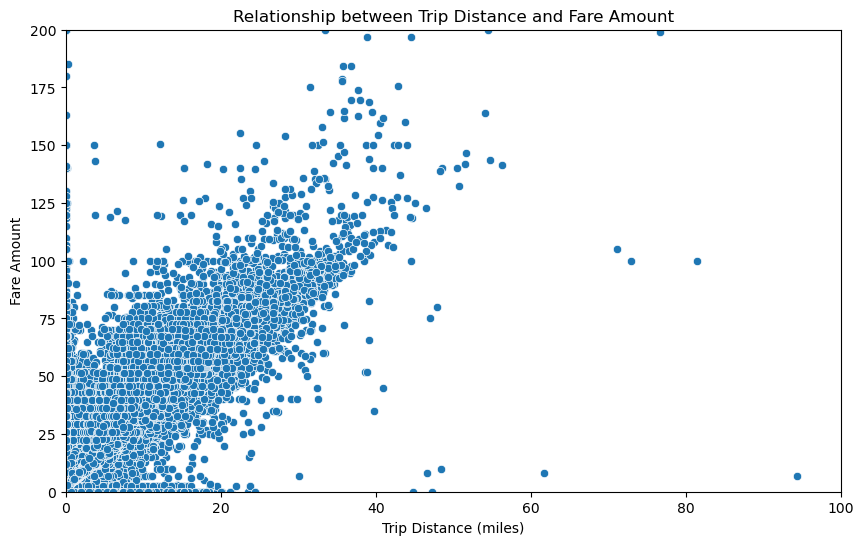

In [215]:
# Question 2: What is the relationship between trip distance and fare amount?
def plot_trip_distance_vs_fare(dataframe):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='trip distance', y='fare amount', data=dataframe)
    plt.title('Relationship between Trip Distance and Fare Amount')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Fare Amount')
    plt.xlim(0, 100)
    plt.ylim(0, 200) 
    plt.show()

# Call the function to plot the relationship between trip distance and fare amount
plot_trip_distance_vs_fare(df)

Most of time fare amount increases by increasing the trip distance.

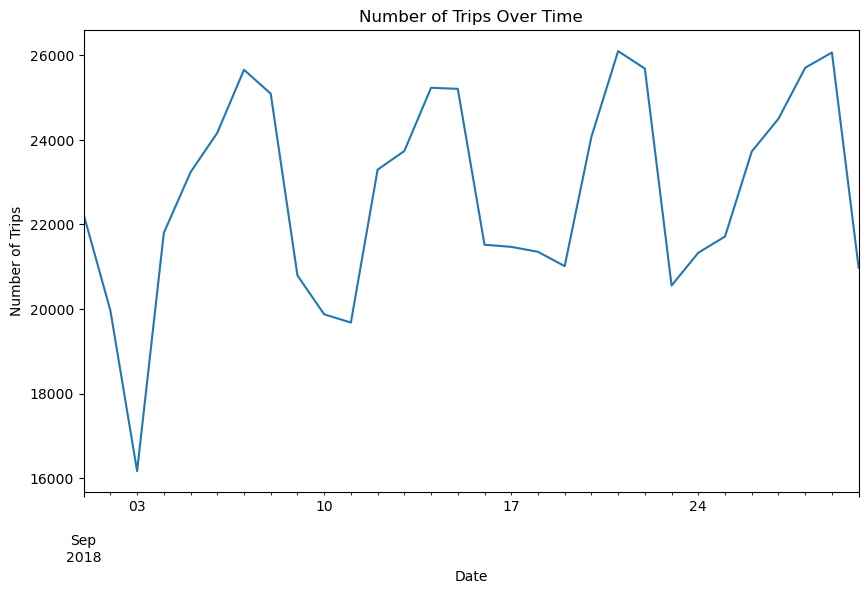

In [216]:
# Question 3: How does the number of trips change over time?
# First, convert pickup and dropoff times to datetime


def plot_trip_count_over_time(dataframe, start_date, end_date):
    
    df_copy = dataframe.copy()

    
    df_copy['lpep pickup datetime'] = pd.to_datetime(df_copy['lpep pickup datetime'])
    df_copy['lpep dropoff datetime'] = pd.to_datetime(df_copy['lpep dropoff datetime'])

    
    filtered_data = df_copy[(df_copy['lpep pickup datetime'] >= start_date) & (df_copy['lpep pickup datetime'] <= end_date)]

  
    trips_per_day = filtered_data.resample('D', on='lpep pickup datetime').size()

    plt.figure(figsize=(10, 6))
    trips_per_day.plot(kind='line')
    plt.xlabel('Date')
    plt.title('Number of Trips Over Time')
    plt.ylabel('Number of Trips')
    plt.show()


start_date = '2018-09-01'
end_date = '2018-10-01'


plot_trip_count_over_time(df, start_date, end_date)


Approximately in the wwekend the number of trips increase.

<Figure size 1000x600 with 0 Axes>

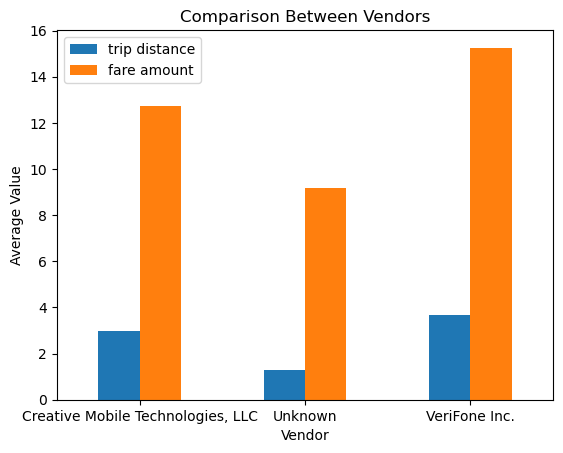

In [217]:
# Question 4: Are there differences between vendors?
def compare_vendors(dataframe):
    
    vendor_comparison = dataframe.groupby('Vendor')[['trip distance', 'fare amount']].mean()

   
    plt.figure(figsize=(10, 6))
    vendor_comparison.plot(kind='bar')
    plt.title('Comparison Between Vendors')
    plt.xlabel('Vendor')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.show()


compare_vendors(df)

VeriFone Inc. has the higher trip distances and higher fares.

<Figure size 1000x600 with 0 Axes>

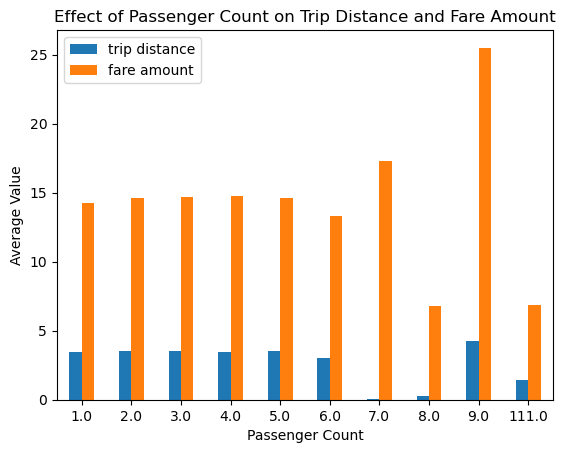

In [218]:
# Question 5: How does passenger count affect other variables?
def analyze_passenger_count(dataframe):
    
    passenger_comparison = dataframe.groupby('passenger count')[['trip distance', 'fare amount']].mean()


    plt.figure(figsize=(10, 6))
    passenger_comparison.plot(kind='bar')
    plt.title('Effect of Passenger Count on Trip Distance and Fare Amount')
    plt.xlabel('Passenger Count')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.show()

analyze_passenger_count(df)

Approximately most of the time the more passengers the higher the fare amount. But it seems that for 7 and 8 passenger rides , the trip distance is very small.

# 3 - Cleaning Data

## Tidying up column names

In [219]:
def rename_columns(dataframe):
#     make all cols lower case
    dataframe.columns = dataframe.columns.str.lower()
    # Iterate through the column names and replace space with underscore,
#     using list comprehension
    dataframe.columns = [col.replace(' ', '_') for col in dataframe.columns]
rename_columns(df)
 

In [220]:
df.columns   

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

all column names became lower case and have no spaces.

## Observe inconsistent data

In [221]:
def remove_duplicates(dataframe):
    print("Number of duplicate rows = ", dataframe.duplicated().sum())
    dataframe.drop_duplicates(inplace=True)
    print("Number of duplicate rows after removing duplicates = ", dataframe.duplicated().sum())

    
    
remove_duplicates(df) 
#passenger_count_to_int(df)

Number of duplicate rows =  9
Number of duplicate rows after removing duplicates =  0


In [222]:
 # change passenger_count data type to int  
def passenger_count_to_int(dataframe):
    print("original passenger_count data type ", dataframe.passenger_count.dtype)
    dataframe['passenger_count'] = dataframe['passenger_count'].astype(int) 
    print("updated passenger_count data type ", dataframe.passenger_count.dtype)

In [223]:
#  7   passenger count        665302 non-null  float64
#  8   trip distance          682046 non-null  float64
#  9   fare amount            682046 non-null  float64
#  10  extra                  317351 non-null  float64
#  11  mta tax                682046 non-null  float64
#  12  tip amount             682046 non-null  float64
#  13  tolls amount           682046 non-null  float64
#  14  ehail fee              0 non-null       float64
#  15  improvement surcharge  682046 non-null  float64
#  16  total amount           682046 non-null  float64
# check for numerical values for any negative rows
def replace_with_mean(df,column):
   
    negative_count = (df[column] < 0).sum()
    print(f"Number of negative {column} = {negative_count}")
        
    if(negative_count>0):
     # Replace negative fares with the median fare
        index_of_first_negative = df[df[column] < 0].index[0]
        print("1st row having the issue ",df[df[column] < 0].head(1)[column] )
        mean_fare = df[df[column] >= 0][column].mean()
        print(column," mean ",mean_fare)
        df.loc[df[column] < 0, column] = mean_fare
        print("1st row having the issue after updating ", index_of_first_negative, df.loc[index_of_first_negative, column] )
        negative_count = (df[column] < 0).sum()
        print(f"updated Number of negative {column} = {negative_count}")

def column_negatives():
    numerical_columns = ['passenger_count', 'fare_amount', 'trip_distance', 'tip_amount', 'tolls_amount', 'total_amount', "mta_tax"]

    for column in numerical_columns:
        replace_with_mean(df,column)
column_negatives()        


Number of negative passenger_count = 0
Number of negative fare_amount = 1702
1st row having the issue  475   -25.0
Name: fare_amount, dtype: float64
fare_amount  mean  14.931773876105156
1st row having the issue after updating  475 14.931773876105156
updated Number of negative fare_amount = 0
Number of negative trip_distance = 0
Number of negative tip_amount = 7
1st row having the issue  13059   -0.99
Name: tip_amount, dtype: float64
tip_amount  mean  1.0349176429189333
1st row having the issue after updating  13059 1.0349176429189333
updated Number of negative tip_amount = 0
Number of negative tolls_amount = 0
Number of negative total_amount = 1700
1st row having the issue  475   -25.0
Name: total_amount, dtype: float64
total_amount  mean  17.38533426816416
1st row having the issue after updating  475 17.38533426816416
updated Number of negative total_amount = 0
Number of negative mta_tax = 1645
1st row having the issue  1044   -0.5
Name: mta_tax, dtype: float64
mta_tax  mean  0.49167

In [224]:
# print(((df["improvement_surcharge"] != 0.3) & (df["improvement_surcharge"] != 0.0)).sum())
def replace_values_with_zero(df, column, condition):
    # Use the provided condition to filter rows
    print(((df[column] != 0.3) & (df[column] != 0.0)).sum())
    print(df[((df[column] != 0.3) & (df[column] != 0.0))][column])
    
    condition_met = df[column].apply(lambda x: x if condition(x) else 0)
    
    # Update the column with the new values
    
    df.loc[condition(df[column]), column] = 0

    print(((df[column] != 0.3) & (df[column] != 0.0)).sum())



replace_values_with_zero(df, 'improvement_surcharge', lambda x: (x != 0.3) & (x != 0.0))

# print(((df['trip_distance'] == 0) ).sum())

1636
1044     -0.3
1181     -0.3
1228     -0.3
1292     -0.3
1421     -0.3
         ... 
663996   -0.3
664023   -0.3
664876   -0.3
665651   -0.3
665697   -0.3
Name: improvement_surcharge, Length: 1636, dtype: float64
0


## Findings and conclusions

there were 9 duplicate rows , so we removed them because they are too few and will affect our estimations.

passenger_count column is float which doesnot make sense, so will make it integer but not now 
as there are missing values we need to deal with them first.

All numerical columns which have negative inconsistent values are replaced with the mean of positive value instead of removing because there are alot of these columns.

improvement_surcharge column must be only of value 0 or 0.3, so any other value was replaced by default value 0. 

## Observing Missing Data

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet